# The Geometry of Zero-Determinant Strategies

## initialization

In [871]:
# import modules
import numpy as np
## perform symbolic calculations
from sympy import *
## plot figures
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
### colormap
from matplotlib import cm 
from matplotlib import colors as mcolors
### 3d plot
from mpl_toolkits.mplot3d import axes3d 
from mpl_toolkits.mplot3d import art3d
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"
rcParams['hatch.linewidth'] = 3
## compress warnings
import warnings
warnings.filterwarnings('ignore')

In [872]:
# save figures in the folder
_Figure_PATH_ = './figures/'

In [873]:
# default colors of matplotlib
colors = ['C0', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

## symbols & expressions

In [874]:
# define symbols
p_1, p_2, p_3, p_4 = symbols('p_1, p_2, p_3, p_4', real = True) # probabilities to cooperate 
q_1, q_2, q_3, q_4 = symbols('q_1, q_2, q_3, q_4', real = True) # probabilities to cooperate 
R, S, T, P, O = symbols('R, S, T, P, O', real = True) # payoffs for a two-player game
phi, chi = symbols('phi, chi', real = True) # parameters for the linear equation (s_X - O) = chi*(s_Y - O)
init_printing(use_unicode = True) # for a good presentation of mathematics

payoff_con_subs = [(R, 3), (S, 0), (T, 5), (P, 1)] # conventional IPD game with T + S > 2P
payoff_eqn_subs = [(R, 3), (S, 0), (T, 5), (P, 2.5)] # IPD game with T + S = 2P
payoff_abn_subs = [(R, 1), (S, -3), (T, 2), (P, 0)] # IPD game with T + S < 2P

## equalizers
> $P \leq O \leq R$

\begin{equation} 
\begin{cases}
q_1 = 1 - \phi(R - O) \\
q_2 = 1 - \phi(T - O) \\
q_3 = \phi(O - S) \\
q_4 = \phi(O -P)
\end{cases}
\end{equation}

In [875]:
# expressions of q_1, q_2, q_3, and q_4
Q_1 = 1 - phi*(R - O)
Q_2 = 1 - phi*(T - O) 
Q_3 = phi*(O - S) 
Q_4 = phi*(O - P)
# equalizer
equalizer = [(q_1, Q_1), (q_2, Q_2), (q_3, Q_3), (q_4, Q_4)]

## ZD strategies
> $s_X - O = \chi(s_Y - O)$

* baseline payoff: $O$
* extortion factor: $\chi$
* normalization factor: $\phi$

\begin{equation}
\begin{cases}
q_1 = 1 - \phi(R - O)(\chi - 1) \\
q_2 = 1 - \phi[(T - O)\chi + (O - S)] \\
q_3 = \phi[(O - S)\chi + (T - O)] \\
q_4 = \phi(O - P)(\chi - 1)
\end{cases}
\end{equation}

### 3-dimentional hyperplane

\begin{equation}
q_4 = \frac{-(T + S - 2P)q_1 + (R - P)(q_2 + q_3) + T + S - R - P}{2R - T - S}
\end{equation}

> $q_4 \geq 0 \qquad \Rightarrow \qquad (T + S - 2P)(1 - q_1) + (R - P)(q_2 + q_3 - 1) \geq 0$

* $A = (1, 0, 1)$

* $D = (1, 1, 0)$

* $H = (\frac{T + S - R - P}{T + S - 2P}, 0, 0)$


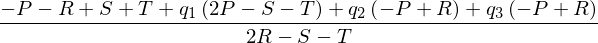

In [876]:
# expressions of q_1, q_2, q_3, and q_4
Q_1 = 1 - phi*(R - O)*(chi - 1) 
Q_2 = 1 - phi*((T - O)*chi + (O - S)) 
Q_3 = phi*((O - S)*chi + (T - O)) 
Q_4 = phi*(O - P)*(chi - 1)
# ZD strategy
ZD = [(q_1, Q_1), (q_2, Q_2), (q_3, Q_3), (q_4, Q_4)]
# 3-dimensional hyperplane
factor((2*P - T - S)*Q_1 + (R - P)*(Q_2 + Q_3) + (T + S - R - P) - (2*R - T - S)*Q_4)
O_sub, chi_sub, phi_sub = [solve([q_1 - Q_1, q_2 - Q_2, q_3 - Q_3], (O, chi, phi))[0][i] for i in range(3)]
collect(collect(collect(factor(Q_4.subs([(O, O_sub), (chi, chi_sub), (phi, phi_sub)])), q_1), q_2), q_3)

## geometry of $(q_1, q_2, q_3)$ for specific choices of $(O, \chi, \phi)$

> one-to-one mapping

\begin{equation}
|\frac{\partial (q_1, q_2, q_3)}{\partial (O, \chi, \phi)}| = (T - S)(2R - T - S)\phi^2(\chi - 1)
\end{equation}

* $\phi = 0$: $(q_1, q_2, q_3) = (1, 1, 0)$
* $\chi = 1$: $(q_1, q_2, q_3) = (1, 1 - \phi(T - S), \phi(T - S))$

### baseline payoff $O$

> two-dimensional plane

* #### equation

\begin{equation}
O = \frac{(T + S)q_1 - R(q_2 + q_3) + R - T - S}{2q_1 - q_2 - q_3 - 1} \\
\Rightarrow \\
q_3 = \frac{(T + S - 2O)q_1 - (R - O)q_2 + R + O - T - S}{R - O}
\end{equation}

* #### normal vector 
\begin{equation}
\vec{n} = (T + S - 2O, -(R - O), -(R - O))
\end{equation}

* #### extortionate ZD with $O = P$

    > \begin{equation}(T + S - 2P)(1 - q_1) + (R - P)(q_2 + q_3 - 1) = 0\end{equation}

    * $A = (1, 0, 1)$
    * $D = (1, 1, 0)$
    * $E = (\frac{T - R}{T - P}, 0, \frac{P - S}{T - P})$
    * $H = (\frac{T + S - R - P}{T + S - 2P}, 0, 0)$
    * $\vec{n} = (T + S - 2P, -(R - P), -(R - P))$

* #### ZD with $O = \frac{T + S}{2}$ 

    > \begin{equation}q_2 + q_3 - 1 = 0\end{equation}
    
    * $A = (1, 0, 1)$
    * $B = (\frac{2(T - R)}{T - S}, 0, 1)$
    * $D = (1, 1, 0)$
    * $I = (0, 1, 0)$
    * $\vec{n} = (0, 1, 1)$
    

* #### generous ZD with $O = R$

    > \begin{equation}q_1 = 1\end{equation}
    
    * $A = (1, 0, 1)$
    * $C = (1, \frac{2R - T - S}{R - S}, 1)$
    * $D = (1, 1, 0)$
    * $F = (1, 1, 1)$
    * $\vec{n} = (1, 0, 0)$

### extortion factor $\chi$

\begin{equation}
\chi = \frac{(T - S)q_1 - (T - R)q_2 - (R - S)q_3 - (R - S)}{-(T - S)q_1 + (R - S)q_2 + (T - R)q_3 + T - R}
\end{equation}

* #### equalizer with $\chi = \infty$

    > \begin{equation}(T - S)(1 - q_1) - (R - S)(1 - q_2) + (T - R)q_3 = 0\end{equation}
    
    * $B = (\frac{2(T - R)}{T - S}, 0, 1)$
    * $C = (1, \frac{2R - T - S}{R - S}, 1)$
    * $D = (1, 1, 0)$
    * $E = (\frac{T - R}{T - P}, 0, \frac{P - S}{T - P})$
    

### normalization factor $\phi$


\begin{equation}
\phi = \frac{(T - S)q_1 - (R - S)q_2 - (T - R)q_3 - (T - R)}{(T - S)(2R - T - S)}
\end{equation}

In [877]:
M_Q = Matrix([Q_1, Q_2, Q_3])
factor(det(M_Q.jacobian([O, chi, phi])))

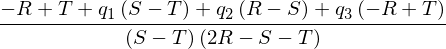

In [878]:
collect(collect(collect(O_sub, q_1), q_2), q_3) # O
collect(collect(collect(chi_sub, q_1), q_2), q_3) # chi
collect(collect(collect(phi_sub, q_1), q_2), q_3) # phi

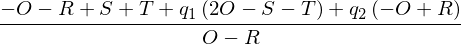

In [879]:
collect(collect(solve(O_sub - O, q_3)[0], q_1), q_2)

### rotation

* #### $D = (1, 1, 0)$, $A = (1, 0, 1)$, $Q = (q_1, q_2, q_3)$

* #### $\vec{DA} = (0, -1, 1)$, $\vec{DQ} = (q_1 - 1, q_2 - 1, q_3)$

\begin{align}
\cos \theta &= \frac{\vec{DQ}\cdot\vec{DA}}{|\vec{DQ}|\cdot|\vec{DA}|} \\
&= \frac{(q_1 - 1, q_2 - 1, q_3)\cdot(0, -1, 1)}{|(q_1 - 1, q_2 - 1, q_3)|\cdot|(0, -1, 1)|} \\
&= \frac{\sqrt{2}(T - S)(\chi + 1)}{2\{(R - O)^2(\chi - 1)^2 + [(T - O)\chi + O - S]^2 + [(O - S)\chi + T - O]^2\}^{1/2}}
\end{align}

\begin{equation} 
\frac{d\cos \theta}{d\chi} = -\frac{\sqrt{2}(T - S)(\chi - 1)[6O^2 - 4O(T + R + S) + 2R^2 + (T + S)^2]}{2\{(R - O)^2(\chi - 1)^2 + [(T - O)\chi + O - S]^2 + [(O - S)\chi + T - O]^2\}^{3/2}}
\end{equation}

> $f(O) = 6O^2 - 4O(T + R + S) + 2R^2 + (T + S)^2 \geq f(\frac{T + R + S}{3}) = \frac{(2R - T - S)^2}{3} > 0$

> $\frac{d\cos \theta}{d\chi} < 0$

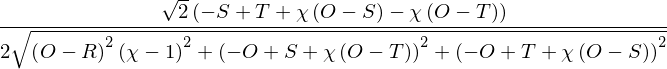

In [880]:
DQ, DA = Matrix([Q_1 - 1, Q_2 - 1, Q_3]), Matrix([0, -1, 1])
cos = simplify(DQ.dot(DA)/(sqrt(DQ.dot(DQ))*sqrt(DA.dot(DA)))/phi*abs(phi))
cos

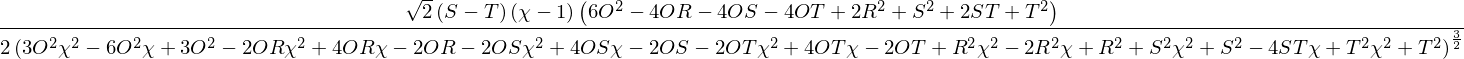

In [881]:
dcos = factor(simplify(diff(cos, chi)))
dcos

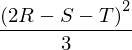

In [882]:
f_O = factor_list(fraction(dcos)[0])[1][2][0]
factor(f_O.subs(O, (T + R + S)/3))

## Figure 1

In [883]:
def figure_plane(name, payoff_subs, fsize = (8, 8), ms = 100, fs = 16):
    
    A = [1, 0, 1]
    B = [2*(T - R)/(T - S), 0, 1]
    C = [1, (2*R - T - S)/(R - S), 1]
    D = [1, 1, 0]
    E = [(T - R)/(T - P), 0, (P - S)/(T - P)]
    F = [1, 1, 1]
    G = [(T - R)/(T - S), 0, 0]
    H = [(T + S - R - P)/(T + S - 2*P), 0, 0]
    I = [0, 1, 0]
    J = [0, 0, 1]
    
    B = [float(B[0].subs(payoff_subs)), B[1], B[2]]
    C = [1, float(C[1].subs(payoff_subs)), C[2]]
    E = [float(E[0].subs(payoff_subs)), E[1], float(E[2].subs(payoff_subs))]
    G = [float(G[0].subs(payoff_subs)), G[1], G[2]]
    H = [float(H[0].subs(payoff_subs)), H[1], H[2]]
    
    # when chi is positive
    planex_dict = {r'ZD with $O = P$': [A, D, E], r'ZD with $O = \frac{T + S}{2}$': [A, D, B], 
                   r'ZD with $O = R$': [A, D, C], 'Equalizer': [B, C, D, E]}
    planex_str_dict = {r'ZD with $O = P$': ['A', 'D', 'E'], r'ZD with $O = \frac{T + S}{2}$': ['A', 'D', 'B'], 
                       r'ZD with $O = R$': ['A', 'D', 'C'], 'Equalizer': ['B', 'C', 'D', 'E']}
    
    # when chi is negative
    planey_dict = {r'ZD with $O = P$': [H, D, E], r'ZD with $O = \frac{T + S}{2}$': [I, D, B, J], 
                   r'ZD with $O = R$': [F, D, C], 'Equalizer': [G, D, E]}
    planey_str_dict = {r'ZD with $O = P$': ['H', 'D', 'E'], r'ZD with $O = \frac{T + S}{2}$': ['I', 'D', 'B', 'J'], 
                       r'ZD with $O = R$': ['F', 'D', 'C'], 'Equalizer': ['G', 'D', 'E']}
    
    planex, planex_str = planex_dict[name], planex_str_dict[name]
    planey, planey_str = planey_dict[name], planey_str_dict[name]
    
    name_str_dict = {r'ZD with $O = P$': 'extortioner', r'ZD with $O = \frac{T + S}{2}$': 'betweener', 
                     r'ZD with $O = R$': 'complier', 'Equalizer': 'equalizer'}
    name_str = name_str_dict[name]
    
    label_str_dict = {r'ZD with $O = P$': r'$\chi = -\frac{T - P}{P - S}$', 
                      r'ZD with $O = \frac{T + S}{2}$': r'$\chi = -1$', 
                      r'ZD with $O = R$': r'$\chi = -\frac{R - S}{T - R}$', 'Equalizer': ''}
    label_str = label_str_dict[name]
    
    fig = plt.figure(figsize = fsize)
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    # draw cube
    r = [0, 1]
    X, Y = np.meshgrid(r, r)
    one = np.ones(4).reshape(2, 2)
    zero = np.zeros(4).reshape(2, 2)
    for triple in [(X, Y, zero), (X, Y, one), (X, zero, Y), (X, one, Y), (one, X, Y), (zero, X, Y)]:
        ax.plot_surface(triple[0], triple[1], triple[2], color = colors[0], edgecolors = None, alpha = 0.02)
    
    for i, plane in enumerate([planex, planey]):
        plane_str = [planex_str, planey_str][i]
        # draw surface
        # extortionate ZD(O = P): (ADEH), mid ZD (O = (T + S)/2): (ABDI)
        # generous ZD (ACDF), Equalizer (BCDEH)
        x = np.array([item[0] for item in plane])
        y = np.array([item[1] for item in plane])
        z = np.array([item[2] for item in plane])
        #ax.scatter(x, y, z, color = colors[0], alpha = 0)
        # 1. create vertices from points
        verts = [list(zip(x, y, z))]
        # 2. create 3d polygons and specify parameters
        srf = art3d.Poly3DCollection(verts, alpha = 0.3, 
                                     facecolor = (lambda v: colors[2] if (name == 'Equalizer') & (v == 1) 
                                                  else colors[i])(i), 
                                     edgecolor = None)
        # 3. add polygon to the figure (current axes)
        plt.gca().add_collection3d(srf)
        
        def average(a, b, w):
            return w*a + (1 - w)*b
        w = 0.1

        # draw lines
        for j, pair in enumerate(zip(plane, plane[1:] + plane[0:1])):
            ax.plot(np.linspace(pair[0][0], pair[1][0], 101), 
                    np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                    linewidth = 3, linestyle = (lambda v: ':' if (name == 'Equalizer') & (v == 1) else '-')(i),
                    color = (lambda v: colors[i] if (name != 'Equalizer') & (v != 1) else 'white')(j), 
                    alpha = 1, zorder = 50)
            if (name != 'Equalizer'):
                if (i == 0) & (j == 0):
                    ax.text(average(pair[0][0], pair[1][0], 5/6), average(pair[0][1], pair[1][1], 5/6), 
                            average(pair[0][2], pair[1][2], 5/6),
                            r'$\chi = 1$', size = fs - 4, color = 'black', zorder = 500)
                elif (i == 0) & (j == 1):
                    ax.text(average(pair[0][0], pair[1][0], 1/2) - w, average(pair[0][1], pair[1][1], 1/2), 
                            average(pair[0][2], pair[1][2], 1/2),
                            r'$|\chi| \to \infty$', size = fs - 4, color = 'black', zorder = 500)
                elif (i == 1) & (j == 0):
                    ww = (lambda v: 5*w if v == r'ZD with $O = R$' else 0)(name)
                    ax.text(average(pair[0][0], pair[1][0] -ww , 5/6), average(pair[0][1], pair[1][1], 5/6), 
                            average(pair[0][2], pair[1][2], 5/6),
                            label_str, size = fs - 4, color = 'black', zorder = 500)
            else:
                ax.text(average(C[0], D[0], 5/6), average(C[1], D[1], 5/6), average(C[2], D[2], 5/6),
                        r'$O = P$', size = fs - 3, color = 'black', zorder = 500)
                ax.text(average(D[0], B[0], 1/2) - w, average(D[1], B[1], 1/2), average(D[2], B[2], 1/2),
                        r'$O = \frac{T + S}{2}$', size = fs - 4, color = 'black', zorder = 500)
                ax.text(average(D[0], E[0], 1/6), average(D[1], E[1], 1/6), average(D[2], E[2], 1/6),
                        r'$O = R$', size = fs - 4, color = 'black', zorder = 500)
                
            
        if name == 'Equalizer': # line DB
            ax.plot(np.linspace(D[0], B[0], 101), np.linspace(D[1], B[1], 101), np.linspace(D[2], B[2], 101), 
                    linewidth = 3, color = 'white', alpha = 1, zorder = 50)
        
        # draw points
        for k, point in enumerate(plane):
            ax.scatter([point[0]], [point[1]], [point[2]], color = 'white', s = ms, alpha = 1, zorder = 200)
            if point != J:
                ax.text(point[0], point[1], point[2], plane_str[k], size = fs - 2, color = 'black', zorder = 500)

    ax.set_title(name, fontsize = fs, y = 1.02)
    
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$', fontsize = fs - 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_linewidth(0.1)
    #ax.spines['left'].set_linewidth(0.1)
    plt.savefig(_Figure_PATH_ + "plane_" + name_str + ".pdf", dpi = 400, transparent = True, bbox_inches = 'tight') 

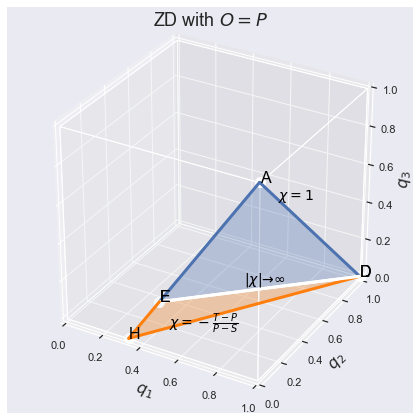

In [884]:
figure_plane(r'ZD with $O = P$', payoff_con_subs, fsize = (6, 6), ms = 100, fs = 18)

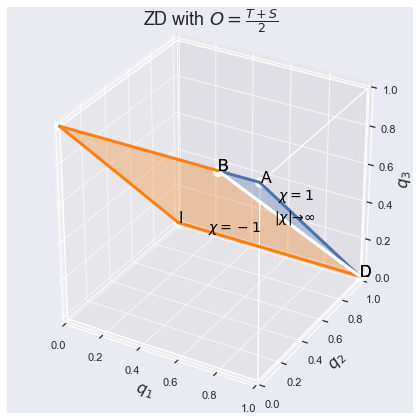

In [885]:
figure_plane(r'ZD with $O = \frac{T + S}{2}$', payoff_con_subs, fsize = (6, 6), ms = 100, fs = 18)

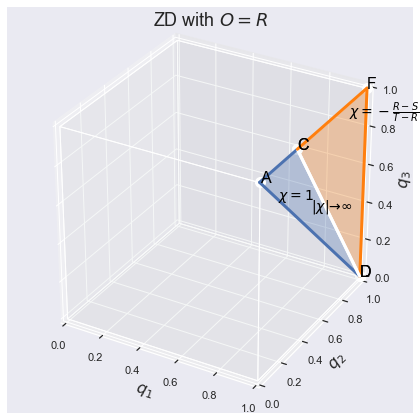

In [886]:
figure_plane(r'ZD with $O = R$', payoff_con_subs, fsize = (6, 6), ms = 100, fs = 18)

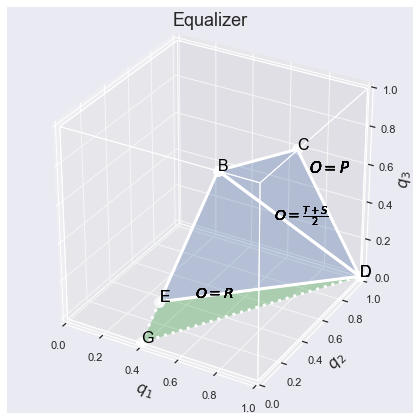

In [887]:
figure_plane('Equalizer', payoff_con_subs, fsize = (6, 6), ms = 100, fs = 18)

## Figure 2

In [888]:
def figure_region(name, payoff_subs, fsize = (8, 8), ms = 100, fs = 16):
    
    O = [0, 0, 0]
    A = [1, 0, 1]
    B = [2*(T - R)/(T - S), 0, 1]
    C = [1, (2*R - T - S)/(R - S), 1]
    D = [1, 1, 0]
    E = [(T - R)/(T - P), 0, (P - S)/(T - P)]
    F = [1, 1, 1]
    H = [(T + S - R - P)/(T + S - 2*P), 0, 0]
    I = [0, 1, 0]
    J = [0, 0, 1]
    K = [0, 1, 1]
    L = [1, 0, 0]
    
    B = [float(B[0].subs(payoff_subs)), B[1], B[2]]
    C = [1, float(C[1].subs(payoff_subs)), C[2]]
    E = [float(E[0].subs(payoff_subs)), E[1], float(E[2].subs(payoff_subs))]
    H = [float(H[0].subs(payoff_subs)), H[1], H[2]]
    
    border_1 = [B, C, D, E]
    border_2 = [D, E, H]
    border_3 = [A, D, E]
    border_23 = [A, D, H]
    
    planes_dict = {r'ZD with $\chi \leq -1$': [[B, C, D, E], [B, C, F, K, J], [B, E, H, O, J], 
                                               [C, D, F], [D, E, H], [D, F, K, I], [D, H, O, I], [I, K, J, O]],
                   r'ZD with $\chi \geq 1$': [[A, B, C], [A, B, E], [A, C, D], [B, C, D, E], [A, D, E]], 
                   'Inadmissible ZD': [[A, D, H], [A, D, L], [A, H, L], [D, H, L]]}
    planes = planes_dict[name]
    pairs_dict = {r'ZD with $\chi \leq -1$': [(B, C), (B, E), (B, J), (C, D), (C, F), (D, E), (D, F), (D, H), (E, H), 
                                              (F, K), (H, O), (J, K), (J, O)], 
                  r'ZD with $\chi \geq 1$': [(A, B), (A, C), (A, D), (A, E), (B, C), (B, E), (C, D), (D, E)], 
                  'Inadmissible ZD': [(A, D), (A, H), (A, L), (D, H), (D, L), (H, L)]}
    pairs = pairs_dict[name]
    
    borders_dict = {r'ZD with $\chi \leq -1$': [border_1, border_2], r'ZD with $\chi \geq 1$': [border_1, border_3],  
                    'Inadmissible ZD': [border_23]}
    borders = borders_dict[name]
    
    color_dict = {r'ZD with $\chi \leq -1$': 1, r'ZD with $\chi \geq 1$': 0,  'Inadmissible ZD': 2}
    cr = color_dict[name]
    
    name_str_dict = {r'ZD with $\chi \leq -1$': 'negative', r'ZD with $\chi \geq 1$': 'positive',  
                     'Inadmissible ZD': 'inadmissible'}
    name_str = name_str_dict[name]
    
    fig = plt.figure(figsize = fsize)
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    # draw cube
    r = [0, 1]
    X, Y = np.meshgrid(r, r)
    one = np.ones(4).reshape(2, 2)
    zero = np.zeros(4).reshape(2, 2)
    for triple in [(X, Y, zero), (X, Y, one), (X, zero, Y), (X, one, Y), (one, X, Y), (zero, X, Y)]:
        ax.plot_surface(triple[0], triple[1], triple[2], color = colors[0], edgecolors = None, alpha = 0.02)
    
    # draw planes
    for i, plane in enumerate(planes):
        # draw surface
        x = np.array([item[0] for item in plane])
        y = np.array([item[1] for item in plane])
        z = np.array([item[2] for item in plane])
        # 1. create vertices from points
        verts = [list(zip(x, y, z))]
        # 2. create 3d polygons and specify parameters
        srf = art3d.Poly3DCollection(verts, alpha = 0.3, facecolor = colors[cr], edgecolor = None)
        # 3. add polygon to the figure (current axes)
        plt.gca().add_collection3d(srf)
        
    # draw edges  
    for pair in pairs:
        ax.plot(np.linspace(pair[0][0], pair[1][0], 101), 
                np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                linewidth = 3, color = colors[cr], 
                alpha = (lambda v: 0 if (name == 'Inadmissible ZD') & (v == (D, H)) else 1)(pair), 
                zorder = 50)
    
    # draw borders
    for border in borders:
        for pair in zip(border, border[1:] + border[0:1]):
            ax.plot(np.linspace(pair[0][0], pair[1][0], 101), 
                    np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                    linewidth = 3, 
                    linestyle = (lambda v: ':' if (name == 'Inadmissible ZD') & (v == (D, H)) else '-')(pair),
                    color = 'white', alpha = 1, 
                    zorder = (lambda v: 20 if (name == 'Inadmissible ZD') & (v == (D, H)) else 50)(pair))
    
            
    ax.set_title(name, fontsize = fs, y = 1.02)
    
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$', fontsize = fs - 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.savefig(_Figure_PATH_ + "region_" + name_str + ".pdf", dpi = 400, transparent = True, bbox_inches = 'tight') 

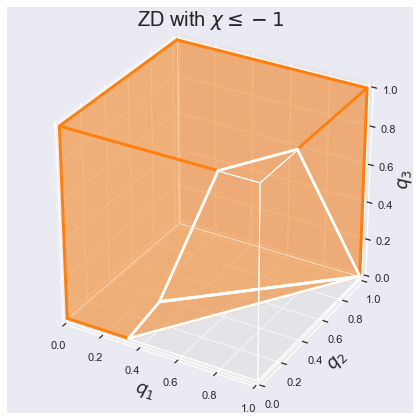

In [889]:
figure_region(r'ZD with $\chi \leq -1$', payoff_con_subs, fsize = (6, 6), ms = 100, fs = 20)

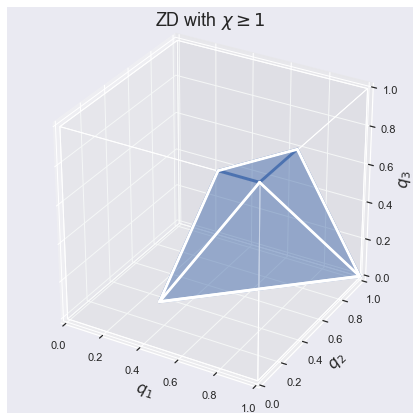

In [890]:
figure_region(r'ZD with $\chi \geq 1$', payoff_con_subs, fsize = (6, 6), ms = 100, fs = 18)

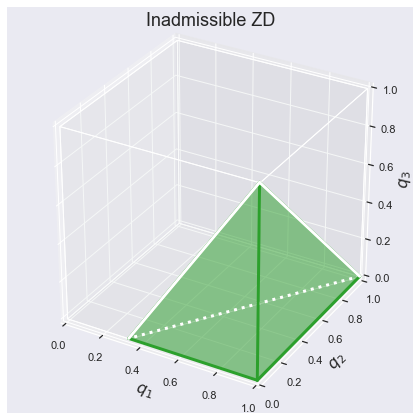

In [891]:
figure_region('Inadmissible ZD', payoff_con_subs, fsize = (6, 6), ms = 100, fs = 18)

## adaptive dynamics of ZD strategies

> ### $\frac{dq_i}{dt} = \frac{\partial \pi(p, q)}{\partial p_i}|_{p = q}$


\begin{align}
\frac{dq_1}{dt} &= \frac{(q_2 + q_3 - 1)[(T - S)q_1 - (R - S)q_2 - (T - R)q_3 - (T - R)]}{(1 - q_2 + q_3)(1 - 2q_1 + q_2 + q_3)^2} \\
&= \frac{(1- q_2 - q_3)[(T - S)(1 - q_1) - (R - S)(1 - q_2) + (T - R)q_3]}{(1 - q_2 + q_3)(1 - 2q_1 + q_2 + q_3)^2} 
\end{align}




\begin{align}
\frac{dq_2}{dt} &= \frac{(1 - q_1)[(T - S)q_1 - (R - S)q_2 - (T - R)q_3 - (T - R)]}{(1 - q_2 + q_3)(1 - 2q_1 + q_2 + q_3)^2} \\
&= -\frac{(1 - q_1)[(T - S)(1 - q_1) - (R - S)(1 - q_2) + (T - R)q_3]}{(1 - q_2 + q_3)(1 - 2q_1 + q_2 + q_3)^2} \\
\end{align}




\begin{equation}
\frac{dq_2}{dt} = \frac{1 - q_1}{q_2 + q_3 - 1}\frac{dq_1}{dt} \\
\frac{dq_3}{dt} = \frac{dq_2}{dt}
\end{equation}

> #### normal vector: $\vec{n} = (q_1 - 1, q_2 - 1, q_3)$

\begin{equation}
(q_1 - 1)\frac{dq_1}{dt} + (q_2 - 1)\frac{dq_2}{dt} + q_3\frac{dq_3}{dt} = 0
\end{equation}

> #### equilibrium manifold: equalizer plane 

\begin{equation}
\frac{dq_1}{dt} = \frac{dq_2}{dt} = \frac{dq_3}{dt} = 0
\end{equation}

In [892]:
# calculate expected payoffs
M_1 = Matrix([[p_1*q_1 - 1, p_1 - 1, q_1 - 1, 1], # 4*4 matrix with the determinant D(p, q, 1)
              [p_2*q_3, p_2 - 1, q_3, 1],
              [p_3*q_2, p_3, q_2 - 1, 1],
              [p_4*q_4, p_4, q_4, 1]])
M = Matrix([[p_1*q_1 - 1, p_1 - 1, q_1 - 1, R], # 4*4 matrix with the determinant D(p, q, pi)
              [p_2*q_3, p_2 - 1, q_3, S],
              [p_3*q_2, p_3, q_2 - 1, T],
              [p_4*q_4, p_4, q_4, P]])

p_4_sub = (-(T + S - 2*P)*p_1 + (R - P)*(p_2 + p_3) + T + S - R - P)/(2*R - T - S)
q_4_sub = (-(T + S - 2*P)*q_1 + (R - P)*(q_2 + q_3) + T + S - R - P)/(2*R - T - S)

M_1 = M_1.subs([(p_4, p_4_sub), (q_4, q_4_sub)])
M = M.subs([(p_4, p_4_sub), (q_4, q_4_sub)])

pi = M.det()/M_1.det() # payoff

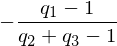

In [893]:
dq_1 = factor(cancel(diff(pi, p_1)).subs([(p_1, q_1), (p_2, q_2), (p_3, q_3)]))
dq_2 = factor(cancel(diff(pi, p_2)).subs([(p_1, q_1), (p_2, q_2), (p_3, q_3)]))
dq_3 = factor(cancel(diff(pi, p_3)).subs([(p_1, q_1), (p_2, q_2), (p_3, q_3)]))
factor(dq_2/dq_1)

In [894]:
factor((q_1 - 1)*dq_1 + (q_2 - 1)*dq_2 + q_3*dq_3)

* #### stability of the equilibrium manifold

\begin{equation}
(T - S, -(R - S), -(T - R))\cdot (\frac{dq_1}{dt}, \frac{dq_2}{dt}, \frac{dq_3}{dt}) 
= \frac{(T - S)(q_1 + q_2 + q_3 - 2)[(T - S)q_1 - (R - S)q_2 - (T - R)q_3 - (T - R)]}{(1 - q_2 + q_3)(1 - 2q_1 + q_2 + q_3)^2}
\end{equation}

* #### cooperation-enhancing region

> $\frac{dq_i}{dt} > 0$ for $i = 1, 2, 3, 4$

\begin{equation}
\frac{dq_4}{dt} = \frac{2(R - P)(1 - q_1) - (T + S - 2P)(q_2 + q_3 - 1)}{(2R - T - S)(q_2 + q_3 - 1)}\frac{dq_1}{dt}
\end{equation}

> two-dimensional plane $(2O - T - S)(1 - q_1) - (R - O)(q_2 + q_3 - 1) = 0$ with $\frac{2O - T - S}{R - O} = \frac{2(R - P)}{T + S - 2P}$

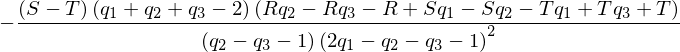

In [895]:
# stability of the equilibrium manifold
factor((T - S)*dq_1 - (R - S)*dq_2 - (T - R)*dq_3)

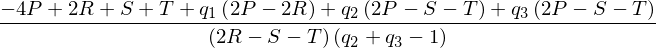

In [896]:
# cooperation-enhancing region
dq_4 = factor((-(T + S - 2*P)*dq_1 + (R - P)*(dq_2 + dq_3))/(2*R - T - S))
collect(collect(collect(factor(dq_4/dq_1), q_1), q_2), q_3)

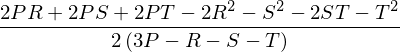

In [897]:
factor(solve(solve(fraction(factor(dq_4/dq_1))[0], q_3)[0] - solve(O_sub - O, q_3)[0], O)[0]) # O

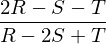

In [898]:
q_sub = solve(factor(2*(T - R)/(T - S)*q + (1 - q) + (2*R - T - S)/(R - S)*(1 - q) - 1), q)[0]
factor(((2*R - T - S)/(R - S)*(1 - q)).subs(q, q_sub))

## Figure 3A

In [908]:
def figure_adaptive_dynamics(dq, payoff_subs, fsize = (6, 6), ms = 100, fs = 16):
    
    B = [2*(T - R)/(T - S), 0, 1]
    C = [1, (2*R - T - S)/(R - S), 1]
    D = [1, 1, 0]
    E = [(T - R)/(T - P), 0, (P - S)/(T - P)]
    G = [(T - R)/(T - S), 0, 0]
    J = [(2*T - R - S)/(T + R - 2*S), (2*R - T - S)/(T + R - 2*S), 1] # q_1 + q_2 + q_3 = 2
    
    B = [float(B[0].subs(payoff_subs)), B[1], B[2]]
    C = [1, float(C[1].subs(payoff_subs)), C[2]]
    E = [float(E[0].subs(payoff_subs)), E[1], float(E[2].subs(payoff_subs))]
    G = [float(G[0].subs(payoff_subs)), G[1], G[2]]
    J = [float(J[0].subs(payoff_subs)), float(J[1].subs(payoff_subs)), 1]
    
    # when chi is positive
    planex, planex_str = [B, C, D, E], ['B', 'C', 'D', 'E']
    # when chi is negative
    planey, planey_str = [G, D, E], ['G', 'D', 'E']
    
    fig = plt.figure(figsize = fsize)
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    # draw cube
    r = [0, 1]
    X, Y = np.meshgrid(r, r)
    one = np.ones(4).reshape(2, 2)
    zero = np.zeros(4).reshape(2, 2)
    for triple in [(X, Y, zero), (X, Y, one), (X, zero, Y), (X, one, Y), (one, X, Y), (zero, X, Y)]:
        ax.plot_surface(triple[0], triple[1], triple[2], color = colors[0], edgecolors = None, alpha = 0.02)
    
    for i, plane in enumerate([planex, planey]):
        plane_str = [planex_str, planey_str][i]
        # draw surface: Equalizer (BCDEH)
        x = np.array([item[0] for item in plane])
        y = np.array([item[1] for item in plane])
        z = np.array([item[2] for item in plane])
        # 1. create vertices from points
        verts = [list(zip(x, y, z))]
        # 2. create 3d polygons and specify parameters
        srf = art3d.Poly3DCollection(verts, alpha = 0.3, facecolor = colors[i*2], edgecolor = None)
        # 3. add polygon to the figure (current axes)
        plt.gca().add_collection3d(srf)

        # draw lines
        for j, pair in enumerate(zip(plane, plane[1:] + plane[0:1])):
            ax.plot(np.linspace(pair[0][0], pair[1][0], 101), 
                    np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                    linewidth = 3, linestyle = (lambda v: ':' if v == 1 else '-')(i),
                    color = 'white', alpha = 1, zorder = 150)
        ax.plot(np.linspace(D[0], J[0], 101), np.linspace(D[1], J[1], 101), np.linspace(D[2], J[2], 101), 
                    linewidth = 3, linestyle = ':', color = 'white', alpha = 1, zorder = 200)
        # draw points
        for k, point in enumerate(plane):
            ax.scatter([point[0]], [point[1]], [point[2]], color = 'white', s = ms, alpha = 1, zorder = 200)
            ax.text(point[0], point[1], point[2], plane_str[k], size = fs - 2, color = 'black', zorder = 500)
            
        ax.scatter([J[0]], [J[1]], [J[2]], color = 'white', s = ms, alpha = 1, zorder = 200)
        ax.text(J[0], J[1], J[2], 'J', size = fs - 2, color = 'black', zorder = 500)
        
    # adaptive dynamics
    epsilon = -0.01
    equalizer_ep =  (epsilon - (T - S)*(1 - q_1) + (R - S)*(1 - q_2))/(T - R)
    equalizer_ep = lambdify([q_1, q_2], equalizer_ep.subs(payoff_subs))
    dq_1, dq_2, dq_3 = [lambdify([q_1, q_2, q_3], dq[i].subs(payoff_subs)) for i in range(3)]
    # arrow style
    arrow_kw = dict(arrowstyle = '-|>', linewidth = 3, mutation_scale = 20)
    for q_1_sub in np.linspace(0, 1, 21):
        for q_2_sub in np.linspace(0, 1, 21):
            q_3_sub = equalizer_ep(q_1_sub, q_2_sub)
            if (q_3_sub > 0) & (q_3_sub < 1):
                u = dq_1(q_1_sub, q_2_sub, q_3_sub)
                v = dq_2(q_1_sub, q_2_sub, q_3_sub)
                w = dq_3(q_1_sub, q_2_sub, q_3_sub)
                cr = (lambda v: colors[3] if v > 0 else colors[0])(q_1_sub + q_2_sub + q_3_sub - 2)
                ax.quiver(q_1_sub, q_2_sub, q_3_sub, u, v, w, arrow_length_ratio = 0.5,
                          color = cr, length = 0.05, normalize = True, zorder = 500)
    
    
    ax.set_title('Adaptive dynamics', fontsize = fs, y = 1.02)
    
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$', fontsize = fs - 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.savefig(_Figure_PATH_ + "adaptive_dynamics.pdf", dpi = 400, transparent = True, bbox_inches = 'tight') 

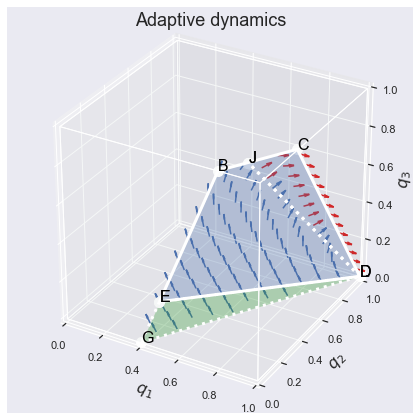

In [909]:
figure_adaptive_dynamics([dq_1, dq_2, dq_3], payoff_con_subs, fsize = (6, 6), ms = 100, fs = 18)

## Figure 3B

In [910]:
def figure_cooperation(payoff_subs, fsize = (8, 8), ms = 100, fs = 16):
    
    A = [1, 0, 1]
    B = [2*(T - R)/(T - S), 0, 1]
    C = [1, (2*R - T - S)/(R - S), 1]
    D = [1, 1, 0]
    q_1a = solve((T - S)*(1 - q_1) - (R - S)*(1 - q_2) + (T - R)*q_3, q_1)[0]
    q_1b = solve(2*(R - P)*(1 - q_1) - (T + S - 2*P)*(q_2 + q_3 - 1), q_1)[0]
    q_2_sub = factor(factor(solve(q_1a - q_1b, q_2)[0]).subs(q_3, 1))
    q_1_sub = factor(q_1a.subs([(q_2, q_2_sub), (q_3, 1)]))
    K = [q_1_sub, q_2_sub, 1]
    
    B = [float(B[0].subs(payoff_subs)), B[1], B[2]]
    C = [1, float(C[1].subs(payoff_subs)), C[2]]
    K = [float(K[0].subs(payoff_subs)), float(K[1].subs(payoff_subs)), K[2]]
    
    planes = [[A, B, D], [A, B, K], [A, D, K], [B, D, K]]
    planes_str = [['A', 'B', 'D'], ['A', 'B', 'K'], ['A', 'D', 'K'], ['B', 'D', 'K']]
    pairs = [(A, B), (A, D), (A, K), (B, D), (B, K), (D, K), (C, K)]
    
    
    fig = plt.figure(figsize = fsize)
    fig.patch.set_facecolor('white')
    ax = fig.gca(projection = '3d')
    # draw cube
    r = [0, 1]
    X, Y = np.meshgrid(r, r)
    one = np.ones(4).reshape(2, 2)
    zero = np.zeros(4).reshape(2, 2)
    for triple in [(X, Y, zero), (X, Y, one), (X, zero, Y), (X, one, Y), (one, X, Y), (zero, X, Y)]:
        ax.plot_surface(triple[0], triple[1], triple[2], color = colors[0], edgecolors = None, alpha = 0.02)
    
    # draw planes
    for i, plane in enumerate(planes):
        plane_str = planes_str[i]
        # draw surface
        x = np.array([item[0] for item in plane])
        y = np.array([item[1] for item in plane])
        z = np.array([item[2] for item in plane])
        # 1. create vertices from points
        verts = [list(zip(x, y, z))]
        # 2. create 3d polygons and specify parameters
        srf = art3d.Poly3DCollection(verts, alpha = 0.3, 
                                     facecolor = (lambda v: colors[4] if v == [A, D, K] else colors[0])(plane), 
                                     edgecolor = None)
        # 3. add polygon to the figure (current axes)
        plt.gca().add_collection3d(srf)
        for k, point in enumerate(plane):
            ax.scatter([point[0]], [point[1]], [point[2]], color = 'white', s = ms, alpha = 1, zorder = 200)
            ax.text(point[0], point[1], point[2], plane_str[k], size = fs - 2, color = 'black', zorder = 500)
        ax.scatter([C[0]], [C[1]], [C[2]], color = 'white', s = ms, alpha = 1, zorder = 200)
        ax.text(C[0], C[1], C[2], 'C', size = fs - 2, color = 'black', zorder = 500)

    # draw edges  
    for pair in pairs:
        ax.plot(np.linspace(pair[0][0], pair[1][0], 101), 
                np.linspace(pair[0][1], pair[1][1], 101), np.linspace(pair[0][2], pair[1][2], 101), 
                linewidth = 3, linestyle = (lambda v: ':' if v == (C, K) else '-')(pair),
                color = 'white', alpha = 1, zorder = 100)
    
    ax.set_title('Cooperation-enhancing region', fontsize = fs, y = 1.02)
    
    ax.set_xlim3d(0, 1)
    ax.set_xlabel(r'$q_1$', fontsize = fs - 2)
    ax.set_ylim3d(0, 1)
    ax.set_ylabel(r'$q_2$', fontsize = fs - 2)
    ax.set_zlim3d(0, 1)
    ax.set_zlabel(r'$q_3$', fontsize = fs - 2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.savefig(_Figure_PATH_ + "cooperation.pdf", dpi = 400, transparent = True, bbox_inches = 'tight') 

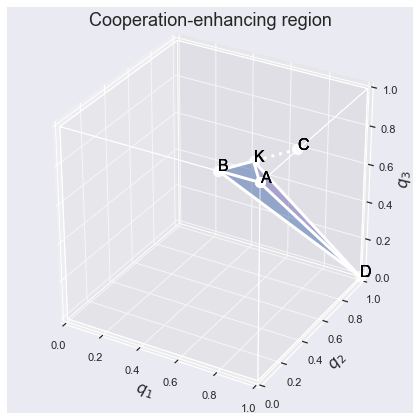

In [911]:
figure_cooperation(payoff_con_subs, fsize = (6, 6), ms = 100, fs = 18)

* #### equal gains from switching: $T + S = R + P$
    * $q_1 = q_3$: $\phi = \frac{1}{(R - S)\chi + T - R}$
    * $q_2 = q_4$: $\phi = \frac{1}{(T - P)\chi + P - S}$
    
\begin{equation}
\begin{cases}
O = \frac{(T + S)(1 - q_1) + R(q_1 + q_2 - 1)}{1 - q_1 + q_2} \\
\chi = \frac{R - S - (T - R)(q_1 - q_2)}{(R - S)(q_1 - q_2) - (T - R)}
\end{cases}
\end{equation}

> $q_1 = q_2 = q_3 = q_4$

> \begin{equation}
\begin{cases}
O = (2R - T - S)q_1 + T + S - R \\
\chi = -\frac{R - S}{T - R} \\
\phi = -\frac{T - R}{(T - S)(2R - T - S)}
\end{cases}
\end{equation}

* #### fun facts of ZD strategies

\begin{equation}
2q_1 - q_2 - q_3 - 1 = -(2R - T - S)\phi(\chi - 1) < 0
\end{equation}


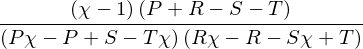

In [903]:
# equal gains from switching: T + S = R + P
solve(Q_3 - Q_1, phi)[0], solve(Q_4 - Q_2, phi)[0]
factor(solve(Q_3 - Q_1, phi)[0] - solve(Q_4 - Q_2, phi)[0])

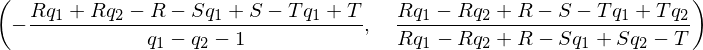

In [904]:
factor(O_sub.subs([(q_3, q_1), (P, T + S - R)])), factor(chi_sub.subs([(q_3, q_1), (P, T + S - R)]))

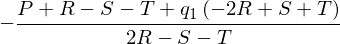

In [905]:
collect(factor(q_4_sub.subs([(q_2, q_1), (q_3, q_1)])), q_1)

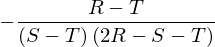

In [906]:
factor(O_sub.subs([(q_2, q_1), (q_3, q_1), (P, T + S - R)]))
factor(chi_sub.subs([(q_2, q_1), (q_3, q_1), (P, T + S - R)]))
factor(phi_sub.subs([(q_2, q_1), (q_3, q_1), (P, T + S - R)]))

In [907]:
factor((2*q_1 - q_2 - q_3 - 1).subs([(q_1, Q_1), (q_2, Q_2), (q_3, Q_3)]))